Worked on by Caleb, Daniel, and Huan

Data Set Used: https://www.kaggle.com/code/harisyammnv/liver-disease-prediction/data

In [122]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Goal: To predict whether or not a patient has a liver diease

In [123]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score

ld_df = pd.read_csv('/content/drive/MyDrive/indian_liver_patient.csv')

In [124]:
ld_df.shape

(583, 11)

In [125]:
ld_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


When looking at the data set, 1 means that they doesn't have any liver disease, 2 means that they does have a liver disease

In [126]:
ld_df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [127]:
ld_df = ld_df.dropna(axis=0)
ld_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         579 non-null    int64  
 1   Gender                      579 non-null    object 
 2   Total_Bilirubin             579 non-null    float64
 3   Direct_Bilirubin            579 non-null    float64
 4   Alkaline_Phosphotase        579 non-null    int64  
 5   Alamine_Aminotransferase    579 non-null    int64  
 6   Aspartate_Aminotransferase  579 non-null    int64  
 7   Total_Protiens              579 non-null    float64
 8   Albumin                     579 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     579 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 54.3+ KB


In [128]:
ld_df = pd.get_dummies(data= ld_df, columns= ['Gender'])

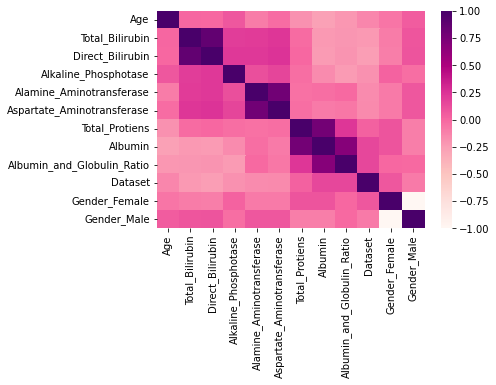

In [129]:
sns.heatmap(data= ld_df.corr(), cmap = 'RdPu')

Looking at the heatmap, there is more correlation between the dataset and Albumin along with Albumin and Globulin Ratio.

In [130]:
ld_df['Dataset'].value_counts()

1    414
2    165
Name: Dataset, dtype: int64

This shows that it is biased towards negative values, so we have to balance the data.

In [131]:
ld_minority = ld_df[(ld_df['Dataset']==2)]
ld_majority = ld_df[(ld_df['Dataset']==1)]

In [132]:
ld_minority_upsampled = resample(ld_minority, replace = True, 
                                      n_samples = 253, random_state = 42)
ld_majority_downsampled = resample(ld_majority, replace = True, 
                                      n_samples = 253, random_state = 42)
ld_upsampled = pd.concat([ld_minority_upsampled, ld_majority_downsampled])
ld_upsampled['Dataset'].value_counts()

2    253
1    253
Name: Dataset, dtype: int64

In [133]:
ld_upsampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 366 to 166
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         506 non-null    int64  
 1   Total_Bilirubin             506 non-null    float64
 2   Direct_Bilirubin            506 non-null    float64
 3   Alkaline_Phosphotase        506 non-null    int64  
 4   Alamine_Aminotransferase    506 non-null    int64  
 5   Aspartate_Aminotransferase  506 non-null    int64  
 6   Total_Protiens              506 non-null    float64
 7   Albumin                     506 non-null    float64
 8   Albumin_and_Globulin_Ratio  506 non-null    float64
 9   Dataset                     506 non-null    int64  
 10  Gender_Female               506 non-null    uint8  
 11  Gender_Male                 506 non-null    uint8  
dtypes: float64(5), int64(5), uint8(2)
memory usage: 44.5 KB


In [134]:
x= ld_df[['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Gender_Female', 'Gender_Male']]
y= ld_df['Dataset']

In [135]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2, random_state = 42)

In [136]:
clf = tree.DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [137]:
pred = clf.predict(x_test)
accuracy = accuracy_score(pred, y_test)
accuracy

0.5862068965517241

In [138]:
confusion_matrix1 = confusion_matrix(pred, y_test)
confusion_matrix1

array([[56, 31],
       [17, 12]])

In [139]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)

pred = rfc.predict(x_test)

In [140]:
accuracy = accuracy_score(pred, y_test)
accuracy

0.6551724137931034

In [141]:
confusion_matrix2 = confusion_matrix(pred, y_test)
confusion_matrix2

array([[65, 32],
       [ 8, 11]])